In [ ]:
# Install necessary libraries
!pip install tensorflow opencv-python

# Import necessary libraries
import os
import zipfile
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

# Unzip the dataset
with zipfile.ZipFile('/content/Artdatanoyo.zip, 'r') as zip_ref:
    zip_ref.extractall('/content/art_data')

# Check the directory structure to confirm the files
print(os.listdir('/content/art_data'))  # Adjust this path based on your dataset structure

# Function to load and preprocess images
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return preprocess_input(img)

# Load a pre-trained model (VGG16 used as an example)
model = VGG16(weights='imagenet')
model.summary()

# Create a Grad-CAM model
layer_name = 'block5_conv3'  # The last convolutional layer in VGG16
grad_model = Model(inputs=[model.inputs], outputs=[model.get_layer(layer_name).output, model.output])

# Example image path
img_path = '/content/Artdatanoyo.zip'
# Load and preprocess an image
preprocessed_img = load_and_preprocess_image(img_path)

# Generate heatmap using Grad-CAM
def generate_heatmap(img_array, model, grad_model, layer_name):
    with tf.GradientTape() as tape:
        tape.watch(img_array)
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, np.argmax(predictions[0])]

    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]

    guided_grads = grads * (grads > 0)
    weights = np.mean(guided_grads, axis=(0, 1))

    cam = np.dot(output, weights)
    cam = cv2.resize(cam, (224, 224), cv2.INTER_LINEAR)
    cam = np.maximum(cam, 0)
    heatmap = (cam - cam.min()) / (cam.max() - cam.min())
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * 0.4 + img_array[0]
    return superimposed_img / 255

# Display the heatmap
import matplotlib.pyplot as plt
heatmap_image = generate_heatmap(preprocessed_img, model, grad_model, layer_name)
plt.imshow(heatmap_image)
plt.axis('off')
plt.show()


BadZipFile: File is not a zip file

In [ ]:
import zipfile

# Path to the new zip file
zip_path = '/content/painting.zip'

# Try opening the zip file to list its contents
try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # List all the files in the zip
        zip_contents = zip_ref.namelist()

        # Print each file name
        print("Contents of the zip file:")
        for file in zip_contents:
            print(file)
except zipfile.BadZipFile:
    print("The file is not a valid zip file.")
except Exception as e:
    print(f"An error occurred: {e}")


Contents of the zip file:
painting/
__MACOSX/._painting
painting/2128.jpg
__MACOSX/painting/._2128.jpg
painting/1637.jpg
__MACOSX/painting/._1637.jpg
painting/1804.jpg
__MACOSX/painting/._1804.jpg
painting/2276.jpg
__MACOSX/painting/._2276.jpg
painting/0307.jpg
__MACOSX/painting/._0307.jpg
painting/0313.jpg
__MACOSX/painting/._0313.jpg
painting/0845.jpg
__MACOSX/painting/._0845.jpg
painting/1554.jpg
__MACOSX/painting/._1554.jpg
painting/0474.jpg
__MACOSX/painting/._0474.jpg
painting/2263.jpg
__MACOSX/painting/._2263.jpg
painting/1805.jpg
__MACOSX/painting/._1805.jpg
painting/1150.jpg
__MACOSX/painting/._1150.jpg
painting/1434.jpg
__MACOSX/painting/._1434.jpg
painting/1620.jpg
__MACOSX/painting/._1620.jpg
painting/2261.jpg
__MACOSX/painting/._2261.jpg
painting/0310.jpg
__MACOSX/painting/._0310.jpg
painting/2275.jpg
__MACOSX/painting/._2275.jpg
painting/0113.jpg
__MACOSX/painting/._0113.jpg
painting/1027.jpg
__MACOSX/painting/._1027.jpg
painting/0098.jpg
__MACOSX/painting/._0098.jpg
pain

In [ ]:
# Check if image files exist
for img_file in image_files:
    img_path = os.path.join(extract_path, img_file)
    if os.path.exists(img_path):
        print(f"File {img_file} exists.")
    else:
        print(f"File {img_file} does not exist.")


File painting/2128.jpg exists.
File painting/1637.jpg exists.
File painting/1804.jpg exists.


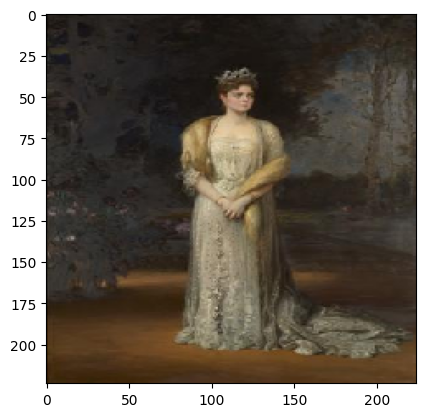

In [ ]:
# Test image loading
test_img_path = os.path.join(extract_path, image_files[0])
test_img = image.load_img(test_img_path, target_size=(224, 224))
plt.imshow(test_img)
plt.show()


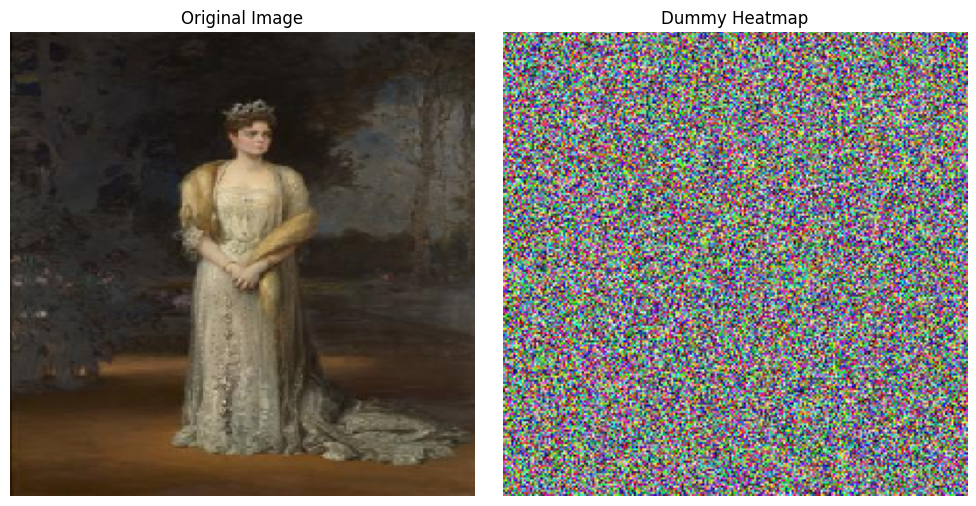

In [ ]:
# Simplified plotting check
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(test_img)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Dummy heatmap for testing
dummy_heatmap = np.random.randint(0, 256, (224, 224, 3), dtype=np.uint8)
axs[1].imshow(dummy_heatmap)
axs[1].set_title('Dummy Heatmap')
axs[1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
def generate_heatmap(img_array, class_idx):
    img_array = tf.convert_to_tensor(img_array)  # Ensure array is a tensor
    with tf.GradientTape() as tape:
        tape.watch(img_array)
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_idx]

    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]
    print("Gradients shape:", grads.shape)  # Debug output
    guided_grads = grads * (grads > 0)
    weights = tf.reduce_mean(guided_grads, axis=(0, 1))
    print("Weights:", weights.numpy())  # Debug output

    cam = np.dot(output, weights.numpy())
    cam = cv2.resize(cam, (224, 224), cv2.INTER_LINEAR)
    cam = np.maximum(cam, 0)
    heatmap = (cam - cam.min()) / (cam.max() - cam.min())
    heatmap = np.uint8(255 * heatmap)
    return cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)


Extraction complete.
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 

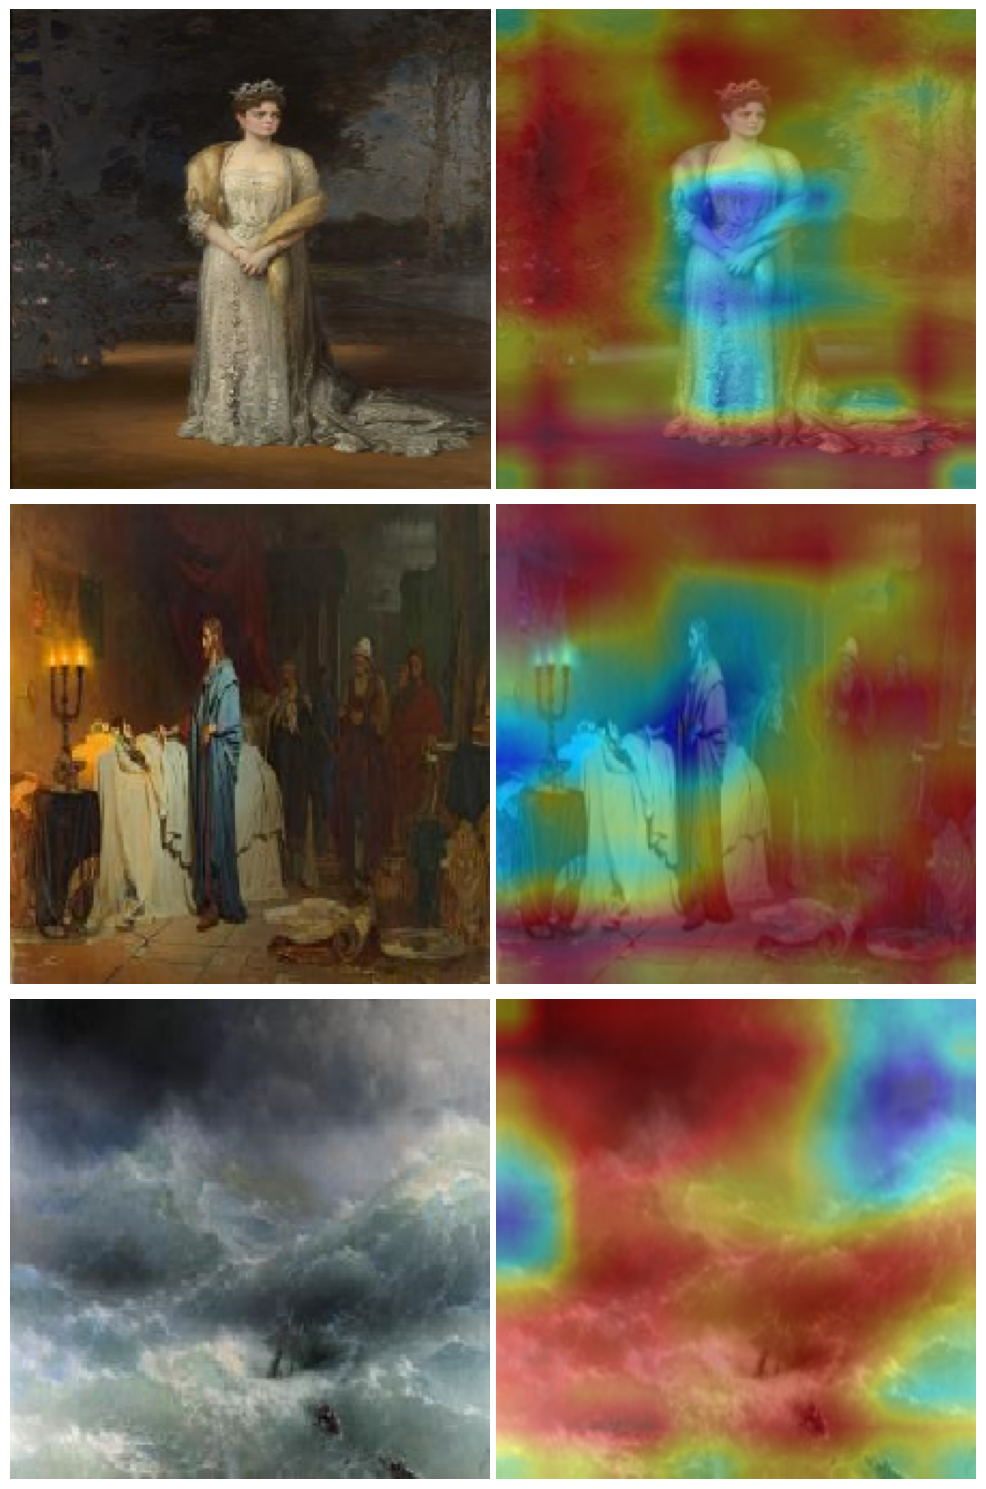

In [ ]:
import zipfile
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import cv2
import matplotlib.pyplot as plt

# Define the path to the zip file and where to extract it
zip_path = '/content/painting.zip'
extract_path = '/content/paintings'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Extraction complete.")

# Load VGG16 model
model = VGG16(weights='imagenet')
model.summary()

# Define the last convolutional layer for Grad-CAM
layer_name = 'block5_conv3'
grad_model = Model(inputs=model.inputs, outputs=[model.get_layer(layer_name).output, model.output])

# Function to load and preprocess image
def load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return preprocess_input(img)

# Function to generate Grad-CAM heatmap
def generate_heatmap(img_array, class_idx):
    img_array = tf.convert_to_tensor(img_array)  # Ensure array is a tensor
    with tf.GradientTape() as tape:
        tape.watch(img_array)
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_idx]

    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]
    # Convert boolean tensor to float tensor for multiplication
    guided_grads = grads * tf.cast(grads > 0, dtype=tf.float32)
    weights = tf.reduce_mean(guided_grads, axis=(0, 1))

    cam = np.dot(output, weights.numpy())
    cam = cv2.resize(cam, (224, 224), cv2.INTER_LINEAR)
    cam = np.maximum(cam, 0)
    heatmap = (cam - cam.min()) / (cam.max() - cam.min())
    heatmap = np.uint8(255 * heatmap)
    return cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)


    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]
    guided_grads = grads * (grads > 0)
    weights = tf.reduce_mean(guided_grads, axis=(0, 1))

    cam = np.dot(output, weights.numpy())
    cam = cv2.resize(cam, (224, 224), cv2.INTER_LINEAR)
    cam = np.maximum(cam, 0)
    heatmap = (cam - cam.min()) / (cam.max() - cam.min())
    heatmap = np.uint8(255 * heatmap)
    return cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# List of images to apply Grad-CAM
image_files = [
    'painting/2128.jpg', 'painting/1637.jpg', 'painting/1804.jpg'
]

# Process and display each image with its heatmap
fig, axs = plt.subplots(len(image_files), 2, figsize=(10, 5 * len(image_files)))

for i, img_file in enumerate(image_files):
    img_path = os.path.join(extract_path, img_file)
    if not os.path.exists(img_path):
        print(f"File {img_file} does not exist.")
        continue
    img_array = load_image(img_path)
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions)
    print(f"Predictions for {img_file}: {predictions}")
    heatmap = generate_heatmap(img_array, class_idx)

    # Original image
    img = image.load_img(img_path, target_size=(224, 224))
    axs[i, 0].imshow(img)
    axs[i, 0].axis('off')

    # Heatmap on image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    axs[i, 1].imshow(superimposed_img)
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()


In [24]:
import zipfile
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import cv2
import matplotlib.pyplot as plt

# Define the path to the zip file and where to extract it
zip_path = '/content/painting.zip'
extract_path = '/content/paintings'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Extraction complete.")

# Load VGG16 model
model = VGG16(weights='imagenet')
model.summary()

# Define the last convolutional layer for Grad-CAM
layer_name = 'block5_conv3'
grad_model = Model(inputs=model.inputs, outputs=[model.get_layer(layer_name).output, model.output])

# Function to load and preprocess image
def load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return preprocess_input(img)

# Function to generate Grad-CAM heatmap
def generate_heatmap(img_array, class_idx):
    img_array = tf.convert_to_tensor(img_array)  # Ensure array is a tensor
    with tf.GradientTape() as tape:
        tape.watch(img_array)
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_idx]

    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]
    # Convert boolean tensor to float tensor for multiplication
    guided_grads = grads * tf.cast(grads > 0, dtype=tf.float32)
    weights = tf.reduce_mean(guided_grads, axis=(0, 1))

    cam = np.dot(output, weights.numpy())
    cam = cv2.resize(cam, (224, 224), cv2.INTER_LINEAR)
    cam = np.maximum(cam, 0)
    heatmap = (cam - cam.min()) / (cam.max() - cam.min())
    heatmap = np.uint8(255 * heatmap)
    return cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Create a directory to save final images with heatmaps
output_dir = '/content/final_images_with_heatmaps'
os.makedirs(output_dir, exist_ok=True)

# List of images to apply Grad-CAM
image_files = [
    'painting/2128.jpg', 'painting/1637.jpg', 'painting/1804.jpg'
]

# Process and display each image with its heatmap
for img_file in image_files:
    img_path = os.path.join(extract_path, img_file)
    if not os.path.exists(img_path):
        print(f"File {img_file} does not exist.")
        continue
    img_array = load_image(img_path)
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions)
    print(f"Predictions for {img_file}: {predictions}")
    heatmap = generate_heatmap(img_array, class_idx)

    # Original image
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = cv2.resize(img, (224, 224))
    original_img_path = os.path.join(output_dir, os.path.basename(img_file))
    cv2.imwrite(original_img_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

    # Heatmap on image
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    heatmap_img_path = os.path.join(output_dir, f'{os.path.splitext(os.path.basename(img_file))[0]}_heatmap.jpg')
    cv2.imwrite(heatmap_img_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

print("Images with heatmaps saved in 'final_images_with_heatmaps' directory.")


Extraction complete.
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 

1/1 [==============================] - 1s 838ms/step
Predictions for painting/2128.jpg: [[3.81299978e-05 2.73060705e-05 3.78414406e-05 2.49541281e-05
  2.23494062e-04 3.43129432e-05 7.03426995e-05 7.70313272e-05
  4.49497820e-05 2.60621571e-04 1.22485253e-05 1.91608215e-05
  5.79856496e-05 3.31902447e-05 2.20697493e-05 1.61104126e-05
  7.88483703e-06 2.08431738e-05 1.15227867e-05 3.91980830e-05
  9.96652670e-05 2.73132846e-05 5.59489636e-05 8.94703335e-05
  2.78172956e-04 2.69352586e-05 5.62602836e-05 1.51379982e-05
  5.63930189e-06 3.72240102e-05 2.94417434e-04 1.08337699e-04
  1.38269883e-04 1.12140330e-03 1.70263799e-03 4.04285587e-04
  9.05853929e-04 7.73729116e-05 6.18701160e-05 2.78393767e-04
  3.45829685e-05 3.58235775e-05 8.26174510e-05 1.22149130e-02
  1.38184390e-04 8.36703170e-04 2.80643599e-05 1.60345779e-04
  4.75927023e-03 1.95764489e-02 1.01628760e-02 1.73504313e-03
  3.49140028e-05 1.86466223e-05 5.49191376e-04 9.23819753e-05
  9.72366797e-06 3.84174418e-05 1.04208977e-

error: OpenCV(4.8.0) /io/opencv/modules/core/src/arithm.cpp:672: error: (-5:Bad argument) When the input arrays in add/subtract/multiply/divide functions have different types, the output array type must be explicitly specified in function 'arithm_op'


In [25]:
import tensorflow as tf

# Define your function outside the loop
@tf.function
def your_function(inputs):
    # Function implementation
    return tf.reduce_sum(inputs)

# Generate some example data
data = [tf.constant([1, 2, 3]), tf.constant([4, 5, 6]), tf.constant([7, 8, 9])]

# Call your function inside the loop
for inputs in data:
    result = your_function(inputs)
    print("Result:", result.numpy())


Result: 6
Result: 15
Result: 24
